<a href="https://colab.research.google.com/github/naufal172/srl-learning-behavior-analysis/blob/main/srl-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

import pandas as pd
print("Library berhasil diimport!")

SyntaxError: invalid syntax (ipython-input-2699700049.py, line 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# === STEP 1: Baca raw file log ===
with open("logs_CPI1H3-IF-47-01PJJ_KALKULUSLANJUT_DNS_2324_2 (2).csv", "r", encoding="utf-8-sig") as f:
    lines = f.readlines()

clean_rows = []

# === STEP 2: Bersihkan baris dan gabungkan waktu ===
for line in lines:
    parts = [p.strip().strip('"') for p in line.strip().split(',')]

    if len(parts) >= 10:
        full_time = parts[0] + ', ' + parts[1]
        row = [full_time] + parts[2:10]
        clean_rows.append(row)

# === STEP 3: Buat DataFrame ===
columns = ['Time', 'User full name', 'Affected user', 'Event context',
           'Component', 'Event name', 'Description', 'Origin', 'IP address']
df = pd.DataFrame(clean_rows, columns=columns)

# === STEP 4: Liat semua user unik dulu sebelum filter
print("👀 Daftar User full name unik:")
print(df['User full name'].dropna().unique())
print("\n🔁 Total user unik:", df['User full name'].nunique())
print("Silakan cek dulu di atas user mana yang mau dihapus sebelum lanjut.\n")

FileNotFoundError: [Errno 2] No such file or directory: 'logs_CPI1H3-IF-47-01PJJ_KALKULUSLANJUT_DNS_2324_2 (2).csv'

In [ ]:
import pandas as pd

# === STEP 1: Baca file CSV mentah ===
with open("logs_CPI1H3-IF-47-01PJJ_KALKULUSLANJUT_DNS_2324_2 (2).csv", "r", encoding="utf-8-sig") as f:
    lines = f.readlines()

clean_rows = []

# === STEP 2: Gabungkan tanggal dan waktu, simpan kolom penting ===
for line in lines:
    parts = [p.strip().strip('"') for p in line.strip().split(',')]
    if len(parts) >= 10:
        full_time = parts[0] + ', ' + parts[1]  # Gabungkan tanggal dan jam
        row = [full_time] + parts[2:10]
        clean_rows.append(row)

# === STEP 3: Buat DataFrame ===
columns = ['Time', 'User full name', 'Affected user', 'Event context',
           'Component', 'Event name', 'Description', 'Origin', 'IP address']
df = pd.DataFrame(clean_rows, columns=columns)

# === STEP 4: Konversi kolom waktu jadi datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# === STEP 5: Cek missing value
print("📊 Jumlah Missing Value per Kolom:")
print(df.isnull().sum())

print("\n❓ Ada missing value nggak di data?")
print("👉", df.isnull().values.any())

print("\n📄 Contoh baris yang mengandung missing value:")
print(df[df.isnull().any(axis=1)].head())


C:\Users\OPAL\AppData\Local\Temp\ipykernel_16032\3933715957.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


📊 Jumlah Missing Value per Kolom:
Time              0
User full name    0
Affected user     0
Event context     0
Component         0
Event name        0
Description       0
Origin            0
IP address        0
dtype: int64

❓ Ada missing value nggak di data?
👉 False

📄 Contoh baris yang mengandung missing value:
Empty DataFrame
Columns: [Time, User full name, Affected user, Event context, Component, Event name, Description, Origin, IP address]
Index: []


In [ ]:
import pandas as pd

# Baca file CSV mentah
with open("logs_CPI1H3-IF-47-01PJJ_KALKULUSLANJUT_DNS_2324_2 (2).csv", "r", encoding="utf-8-sig") as f:
    lines = f.readlines()

clean_rows = []

# Ambil kolom penting dan gabungkan tanggal + waktu
for line in lines:
    parts = [p.strip().strip('"') for p in line.strip().split(',')]
    if len(parts) >= 10:
        full_time = parts[0] + ', ' + parts[1]
        row = [full_time] + parts[2:10]
        clean_rows.append(row)

# Buat DataFrame
columns = ['Time', 'User full name', 'Affected user', 'Event context',
           'Component', 'Event name', 'Description', 'Origin', 'IP address']
df = pd.DataFrame(clean_rows, columns=columns)

# Tampilkan jumlah total baris
print(len(df))


94555


In [ ]:
import pandas as pd

# Load log aktivitas
df = pd.read_csv("log_mahasiswa_bersih.csv")

# Pastikan kolom waktu sudah dalam format datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Hilangkan baris yang gagal parsing tanggal
df = df.dropna(subset=['Time'])

# Cari tanggal mulai dan tanggal akhir dari log
tanggal_awal = df['Time'].min()
tanggal_akhir = df['Time'].max()

# Tampilkan hasil
print("Tanggal mulai belajar (awal log):", tanggal_awal.date())
print("Tanggal akhir belajar (akhir log):", tanggal_akhir.date())


Tanggal mulai belajar (awal log): 2024-02-19
Tanggal akhir belajar (akhir log): 2024-06-27


In [ ]:
    import re

    # === STEP 5: Filter user yang bukan mahasiswa (hapus dosen, sistem, asdos, dll) ===
    blacklist_names = [
        'DENI SAEPUDIN',
        'WS USER',
        'SARJANA (S1) PJJ INFORMATIKA TELKOM UNIVERSITY',
        'NAGAZA SYAFA CHARNOVA',
        'SYSTEM CELOE 01'
    ]

    df = df[~df['User full name'].str.upper().isin(blacklist_names)]
    df = df[df['User full name'].str.strip() != '-']  # Buang nama aneh atau kosong

    # === STEP 6: Ubah kolom Time ke datetime format ===
    df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%y, %H:%M', errors='coerce')

    # === STEP 7: Ambil user_id dari kolom Description ===
    def extract_user_id(desc):
        match = re.search(r"user with id '?(\d+)'?", str(desc))
        return match.group(1) if match else None

    df['user_id'] = df['Description'].apply(extract_user_id)

    # === STEP 8: Buang baris yang gagal parsing waktu atau tidak ada user_id ===
    df = df.dropna(subset=['Time', 'user_id'])

    # === STEP 9: Simpan hasil log bersih ===
    df.to_csv("log_mahasiswa_bersih.csv", index=False, encoding="utf-8")
    print("✅ log_mahasiswa_bersih.csv berhasil disimpan! Siap dipakai untuk analisis selanjutnya.")


✅ log_mahasiswa_bersih.csv berhasil disimpan! Siap dipakai untuk analisis selanjutnya.


In [ ]:
import pandas as pd

# Load data CSV hasil parsing awal (log bersih versi mentah)
df = pd.read_csv("log_mahasiswa_bersih.csv")

# Daftar kolom yang ingin dihapus
columns_to_drop = ['Affected user', 'Origin', 'IP address']

# Drop kolom tersebut (jika ada)
df = df.drop(columns=columns_to_drop, errors='ignore')




In [ ]:
import pandas as pd

# Load file CSV hasil bersih
df = pd.read_csv("log_mahasiswa_bersih.csv")

# Cek missing value per kolom
print("🔍 Jumlah missing value per kolom:")
print(df.isnull().sum())


# Hapus duplikat
df = df.drop_duplicates()

# Cek ulang jumlah baris setelah pembersihan
print("✅ Duplikat dihapus. Total baris setelah dibersihkan:", len(df))


print("\n✅ Missing value & duplikat dihapus. Total baris sekarang:", len(df))


🔍 Jumlah missing value per kolom:
Time              0
User full name    0
Affected user     0
Event context     0
Component         0
Event name        0
Description       0
Origin            0
IP address        0
user_id           0
dtype: int64
✅ Duplikat dihapus. Total baris setelah dibersihkan: 55583

✅ Missing value & duplikat dihapus. Total baris sekarang: 55583


In [ ]:
import pandas as pd

# === STEP 1: Load file CSV hasil log bersih ===
df = pd.read_csv("log_mahasiswa_bersih.csv")

# === STEP 2: Cek jumlah missing value per kolom ===
print("🔍 Jumlah missing value per kolom:")
missing_values = df.isnull().sum()
print(missing_values)

# === STEP 3: Hapus duplikat baris (jika ada) ===
initial_rows = len(df)
df = df.drop_duplicates()
after_drop_rows = len(df)

# === STEP 4: Ringkasan hasil pembersihan ===
print(f"\n🧹 Jumlah baris awal      : {initial_rows}")
print(f"🔁 Duplikat yang dihapus  : {initial_rows - after_drop_rows}")
print(f"✅ Total baris akhir      : {after_drop_rows}")

# (Opsional) Simpan ulang data yang sudah dibersihkan
df.to_csv("log_mahasiswa_bersih_final.csv", index=False, encoding='utf-8')
print("\n💾 File disimpan ulang ke: log_mahasiswa_bersih_final.csv")


🔍 Jumlah missing value per kolom:
Time              0
User full name    0
Affected user     0
Event context     0
Component         0
Event name        0
Description       0
Origin            0
IP address        0
user_id           0
dtype: int64

🧹 Jumlah baris awal      : 71588
🔁 Duplikat yang dihapus  : 16005
✅ Total baris akhir      : 55583

💾 File disimpan ulang ke: log_mahasiswa_bersih_final.csv


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("log_mahasiswa_bersih.csv")

# Lihat semua nilai unik pada kolom 'Event name'
event_names = df['Event name'].unique()
components = df['Component'].unique()

# Tampilkan hasil
print("Daftar Component unik:")
for i, comp in enumerate(components, start=1):
    print(f"{i}. {comp}")

# Tampilkan hasil
print("Daftar Event name unik:")
for i, name in enumerate(event_names, start=1):
    print(f"{i}. {name}")


Daftar Component unik:
1. System
2. File
3. URL
4. User report
5. Safe Exam Browser access rules
6. Quiz
7. Assignment
8. Forum
9. File submissions
10. Overview report
11. Page
12. Submission comments
13. H5P
Daftar Event name unik:
1. Course viewed
2. Course user report viewed
3. Course module viewed
4. Course activity completion updated
5. Grade user report viewed
6. Quiz access was prevented
7. Quiz attempt reviewed
8. The status of the submission has been viewed.
9. Feedback viewed
10. User profile viewed
11. A submission has been submitted.
12. Submission created.
13. A file has been uploaded.
14. Submission form viewed.
15. Quiz attempt submitted
16. User graded
17. Quiz attempt summary viewed
18. Quiz attempt viewed
19. Quiz attempt started
20. Grading table viewed
21. Grading form viewed
22. The submission has been graded.
23. Grade overview report viewed
24. Grade item updated
25. Discussion viewed
26. Comment created
27. Submission updated.
28. Course module instance list vie

In [ ]:
import os
import shutil

try:
    os.remove("rekap_time_investment.csv")
except FileNotFoundError:
    print("File rekap_time_investment.csv tidak ditemukan.")

try:
    shutil.rmtree("per_pekan")
except FileNotFoundError:
    print("Folder per_pekan tidak ditemukan.")

print("✅ File dan folder dari script lama sudah dihapus.")


✅ File dan folder dari script lama sudah dihapus.


In [ ]:
import pandas as pd
import itertools
import os

# === 1. Baca dan siapkan data log ===
df = pd.read_csv("log_mahasiswa_bersih.csv")
df["Time"] = pd.to_datetime(df["Time"])
df = df.sort_values(by=["user_id", "Time"])

# Tambahkan kolom 'pekan' berdasarkan tanggal mulai kuliah
start_date = pd.to_datetime("2024-02-19")
df["pekan"] = ((df["Time"] - start_date).dt.days // 7) + 1

# Filter aktivitas hanya dari pekan 1 s.d. 16
df = df[(df["pekan"] >= 1) & (df["pekan"] <= 16)]

# === 2. Filter aktivitas konten pembelajaran ===
konten = ['File', 'URL', 'Page', 'H5P']
mask = (df['Event name'] == 'Course module viewed') & (df['Component'].isin(konten))
df_konten = df[mask].copy()

# Hitung selisih waktu antar event per mahasiswa
df_konten["next_time"] = df_konten.groupby("user_id")["Time"].shift(-1)
df_konten["selisih_detik"] = (df_konten["next_time"] - df_konten["Time"]).dt.total_seconds()

# Estimasi durasi belajar tiap event (maks 15 menit)
df_konten["durasi_menit"] = (df_konten["selisih_detik"] / 60).clip(upper=15)

# === 3. Rekapitulasi frekuensi & durasi per user per pekan ===
rekap_freq = df_konten.groupby(['user_id', 'pekan', 'Component']).size().unstack(fill_value=0).reset_index()

# Tambahkan kolom jika ada komponen yang tidak muncul
for k in konten:
    if k not in rekap_freq.columns:
        rekap_freq[k] = 0

# Rename kolom
rekap_freq = rekap_freq.rename(columns={
    'File': 'frekuensi_file',
    'URL': 'frekuensi_url',
    'Page': 'frekuensi_page',
    'H5P': 'frekuensi_h5p'
})

# Total frekuensi
rekap_freq['total_frekuensi_akses'] = (
    rekap_freq['frekuensi_file'] +
    rekap_freq['frekuensi_url'] +
    rekap_freq['frekuensi_page'] +
    rekap_freq['frekuensi_h5p']
)

# Total durasi
rekap_durasi = df_konten.groupby(['user_id', 'pekan'])['durasi_menit'].sum().reset_index()

# Gabungkan
rekap = pd.merge(rekap_freq, rekap_durasi, on=['user_id', 'pekan'], how='left')
rekap['durasi_menit'] = rekap['durasi_menit'].fillna(0)

# Tambahkan nama
users = df[['user_id', 'User full name']].drop_duplicates()
rekap = rekap.merge(users, on='user_id', how='left')

# Buat kerangka kombinasi user × pekan
weeks = list(range(1, 17))
kerangka = pd.DataFrame(itertools.product(users['user_id'], weeks), columns=['user_id', 'pekan'])
kerangka = kerangka.merge(users, on='user_id', how='left')

# Gabungkan agar data lengkap
final = kerangka.merge(rekap, on=['user_id', 'pekan', 'User full name'], how='left').fillna(0)

# Pastikan kolom numerik
cols_int = [
    'frekuensi_file', 'frekuensi_url', 'frekuensi_page', 'frekuensi_h5p',
    'total_frekuensi_akses'
]
final[cols_int] = final[cols_int].astype(int)
final['durasi_menit'] = final['durasi_menit'].round(1)

# Urutkan dan susun kolom
final = final[[
    'user_id', 'User full name', 'pekan',
    'frekuensi_file', 'frekuensi_url', 'frekuensi_page', 'frekuensi_h5p',
    'total_frekuensi_akses', 'durasi_menit'
]]
final = final.sort_values(by=['User full name', 'pekan'])

# === 4. Simpan file ===

# ✅ Simpan file gabungan di folder utama
final.to_csv("rekap_time_investment_full.csv", index=False)
print("✅ File gabungan disimpan sebagai 'rekap_time_investment_full.csv'")

# ✅ Simpan file per pekan di folder 'per_pekan'
os.makedirs("per_pekan", exist_ok=True)
for p in range(1, 17):
    df_pekan = final[final["pekan"] == p].copy()
    nama_file = f"per_pekan/pekan_{p:02d}_time_investment_2.csv"
    df_pekan.to_csv(nama_file, index=False)

print("✅ 16 file pekanan berhasil disimpan di folder 'per_pekan' 🗂️")


✅ File gabungan disimpan sebagai 'rekap_time_investment_full.csv'
✅ 16 file pekanan berhasil disimpan di folder 'per_pekan' 🗂️


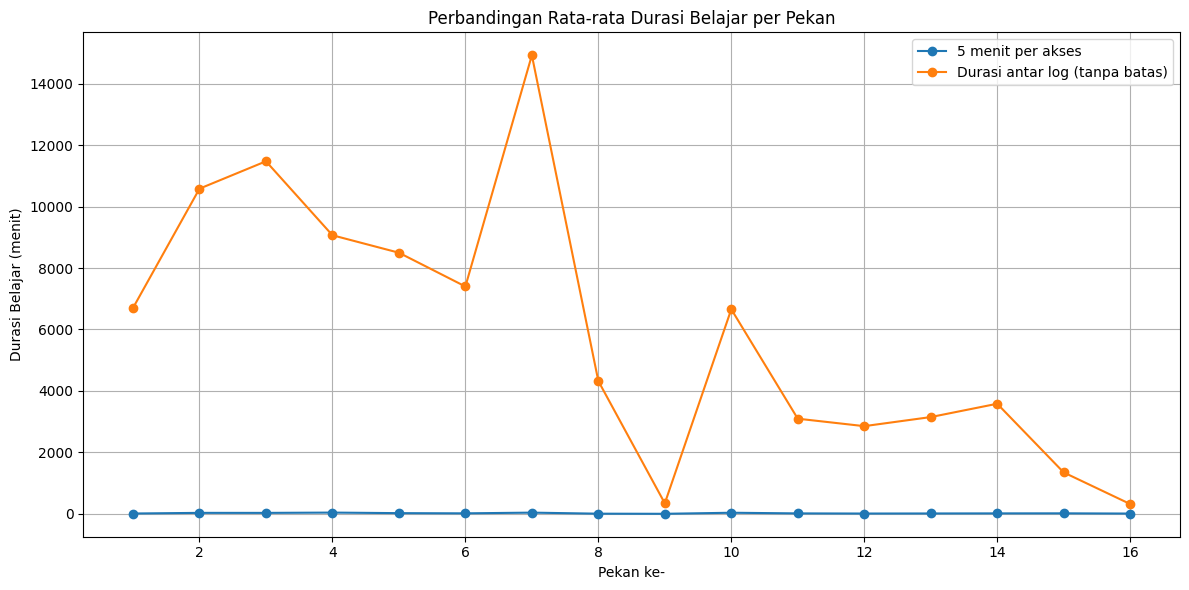

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dua file
df_5menit = pd.read_csv("rekap_time_investment.csv")
df_log = pd.read_csv("rekap_time_investment_2.csv")

# Samakan nama kolom durasi
df_5menit = df_5menit.rename(columns={'total_durasi_menit': 'durasi_menit'})

# Tambahkan info metode
df_5menit["metode"] = "5 menit per akses"
df_log["metode"] = "Durasi antar log (tanpa batas)"

# Gabungkan kedua dataframe
df_combined = pd.concat([df_5menit, df_log], ignore_index=True)

# Hitung rata-rata durasi per pekan
df_avg = df_combined.groupby(["pekan", "metode"])["durasi_menit"].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
for metode in df_avg["metode"].unique():
    data = df_avg[df_avg["metode"] == metode]
    plt.plot(data["pekan"], data["durasi_menit"], marker='o', label=metode)

plt.title("Perbandingan Rata-rata Durasi Belajar per Pekan")
plt.xlabel("Pekan ke-")
plt.ylabel("Durasi Belajar (menit)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# STEP 1: Hitung regularity dari durasi belajar
df = pd.read_csv("rekap_time_investment_2.csv")

# Hitung CV durasi per user
stats = df.groupby("user_id")["durasi_menit"].agg(["mean", "std"]).reset_index()
stats["cv"] = stats["std"] / stats["mean"]
stats["cv"] = stats["cv"].replace([float("inf"), -float("inf")], 0).fillna(0)

# Normalisasi jadi skor 0–1
max_cv = stats["cv"].max()
stats["durasi_regularity_score"] = 1 - (stats["cv"] / max_cv)

# Ambil hanya kolom yang dibutuhkan
reg_score = stats[["user_id", "durasi_regularity_score"]]

# STEP 2: Update semua file mingguan
for week in range(1, 17):
    file_path = f"per_pekan_full_final/pekan_{week:02d}_final.csv"
    df_pekan = pd.read_csv(file_path)

    # Hapus kolom lama kalau ada
    df_pekan = df_pekan.drop(columns=["durasi_regularity_score"], errors="ignore")

    # Gabungkan regularity
    df_pekan = df_pekan.merge(reg_score, on="user_id", how="left")

    # Isi NaN (kalau ada user baru) → 0
    df_pekan["durasi_regularity_score"] = df_pekan["durasi_regularity_score"].fillna(0)

    # Simpan kembali
    df_pekan.to_csv(file_path, index=False)

print("✅ Semua file mingguan di 'per_pekan_full_final/' berhasil diperbarui dengan 'durasi_regularity_score'")


✅ Semua file mingguan di 'per_pekan_full_final/' berhasil diperbarui dengan 'durasi_regularity_score'


In [ ]:
import pandas as pd
import itertools

# Baca data dan ubah waktu
df = pd.read_csv("log_mahasiswa_bersih.csv")
df["Time"] = pd.to_datetime(df["Time"])
df = df.sort_values(by=["user_id", "Time"])

# Tambah kolom pekan ke-berapa
start_date = pd.to_datetime("2024-02-19")
df["pekan"] = ((df["Time"] - start_date).dt.days // 7) + 1

# Ambil daftar user dan nama
user_names = df[['user_id', 'User full name']].drop_duplicates()

# Filter aktivitas kuis & tugas yang benar-benar menunjukkan pengerjaan
event_quiz_tugas = [
    "Quiz attempt started",
    "Quiz attempt submitted",
    "Submission created.",
    "A submission has been submitted."
]

mask = (
    df["Component"].isin(["Quiz", "Assignment"]) &
    df["Event name"].isin(event_quiz_tugas)
)

df_quiz_tugas = df[mask].copy()

# Hitung frekuensi per user per pekan
rekap_qt = df_quiz_tugas.groupby(["user_id", "pekan"]).size().reset_index(name="frekuensi_tugas_quiz")
rekap_qt["durasi_tugas_quiz"] = rekap_qt["frekuensi_tugas_quiz"] * 10  # asumsi 10 menit per aktivitas

# Buat kombinasi semua user × pekan 1-16
all_combinations = pd.DataFrame(list(itertools.product(user_names["user_id"].unique(), range(1, 17))), columns=["user_id", "pekan"])

# Merge dengan rekap agar pekan tanpa aktivitas muncul
rekap_qt = all_combinations.merge(rekap_qt, on=["user_id", "pekan"], how="left")

# Isi NaN dengan 0
rekap_qt["frekuensi_tugas_quiz"] = rekap_qt["frekuensi_tugas_quiz"].fillna(0).astype(int)
rekap_qt["durasi_tugas_quiz"] = rekap_qt["durasi_tugas_quiz"].fillna(0).astype(int)

# Tambahkan nama lengkap
rekap_qt = rekap_qt.merge(user_names, on="user_id", how="left")

# Urutkan hasil
rekap_qt = rekap_qt[['user_id', 'User full name', 'pekan', 'frekuensi_tugas_quiz', 'durasi_tugas_quiz']]
rekap_qt = rekap_qt.sort_values(by=['User full name', 'pekan'])

# Simpan ke CSV
rekap_qt.to_csv("rekap_quiz_tugas_per_minggu.csv", index=False)

print(rekap_qt.head(10))
for pekan in range(1, 17):
    df_mingguan = rekap_qt[rekap_qt["pekan"] == pekan]
    df_mingguan.to_csv(f"dataset_quiz_tugas_pekan_{pekan}.csv", index=False)

print("✅ Semua dataset mingguan quiz & tugas berhasil disimpan.")


     user_id User full name  pekan  frekuensi_tugas_quiz  durasi_tugas_quiz
288    76562    ABDUL MALIK      1                     0                  0
289    76562    ABDUL MALIK      2                    14                140
290    76562    ABDUL MALIK      3                     5                 50
291    76562    ABDUL MALIK      4                     7                 70
292    76562    ABDUL MALIK      5                     6                 60
293    76562    ABDUL MALIK      6                     4                 40
294    76562    ABDUL MALIK      7                     7                 70
295    76562    ABDUL MALIK      8                     2                 20
296    76562    ABDUL MALIK      9                     0                  0
297    76562    ABDUL MALIK     10                     8                 80
✅ Semua dataset mingguan quiz & tugas berhasil disimpan.


In [ ]:
import pandas as pd
import os

# Baca data rekap tugas & quiz
rekap_qt = pd.read_csv("rekap_quiz_tugas_per_minggu.csv")

# Buat folder 'dataset_per_minggu/quiz_tugas' kalau belum ada
output_folder = "dataset_per_minggu/quiz_tugas"
os.makedirs(output_folder, exist_ok=True)

# Simpan 16 file berdasarkan minggu
for week in range(1, 17):
    df_mingguan = rekap_qt[rekap_qt["week_num"] == week]
    filename = f"{output_folder}/week_{week:02d}_quiz_tugas.csv"
    df_mingguan.to_csv(filename, index=False)

print("✅ Semua file quiz & tugas per minggu tersimpan di folder 'dataset_per_minggu/quiz_tugas'")


✅ Semua file quiz & tugas per minggu tersimpan di folder 'dataset_per_minggu/quiz_tugas'


In [ ]:
import pandas as pd

# Baca data rekap quiz dan tugas
rekap_qt = pd.read_csv("rekap_quiz_tugas_per_minggu.csv")

# Loop dari week 1 sampai 16
for week in range(1, 17):
    df_mingguan = rekap_qt[rekap_qt["week_num"] == week]
    df_mingguan.to_csv(f"dataset_quiz_tugas_pekan_{week}.csv", index=False)

print("✅ Semua dataset mingguan quiz & tugas berhasil disimpan.")


✅ Semua dataset mingguan quiz & tugas berhasil disimpan.


In [ ]:
import pandas as pd
import os

# Baca data log mahasiswa
df = pd.read_csv("log_mahasiswa_bersih.csv")
df["Time"] = pd.to_datetime(df["Time"])

# Tentukan awal minggu perkuliahan
start_date = pd.to_datetime("2024-02-19")

# Hitung minggu keberapa dari start_date
df["pekan"] = ((df["Time"] - start_date).dt.days // 7) + 1

# Filter hanya minggu 1–16
df = df[(df["pekan"] >= 1) & (df["pekan"] <= 16)]

# Definisikan event terkait forum
event_QA_visit = ["Discussion viewed"]
event_QA_post = ["Post created", "Comment created", "Some content has been posted", "Post updated"]
event_QA_all = event_QA_visit + event_QA_post

# Ambil hanya aktivitas forum
df_forum = df[df["Event name"].isin(event_QA_all)].copy()

# Hitung durasi aktivitas forum per pekan per mahasiswa
forum_durasi = []
for (user, pekan), group in df_forum.groupby(["user_id", "pekan"]):
    group = group.sort_values("Time")
    group["Time_diff"] = group["Time"].diff().fillna(pd.Timedelta(seconds=0))
    group["new_session"] = group["Time_diff"] > pd.Timedelta(minutes=30)
    group["session_id"] = group["new_session"].cumsum()

    for session_id, sesi in group.groupby("session_id"):
        if len(sesi) > 1:
            durasi = sesi["Time"].max() - sesi["Time"].min()
            forum_durasi.append({
                "user_id": user,
                "pekan": pekan,
                "durasi_sesi": durasi.total_seconds() / 60  # satuan: menit
            })

# ➕ Gabungkan durasi sesi jadi total per user per pekan
durasi_df = pd.DataFrame(forum_durasi)
durasi_df = durasi_df.groupby(["user_id", "pekan"], as_index=False)["durasi_sesi"].sum()
durasi_df = durasi_df.rename(columns={"durasi_sesi": "total_durasi_forum"})

# Hitung kunjungan ke forum
kunjungan_df = df[df["Event name"] == "Discussion viewed"] \
    .groupby(["user_id", "pekan"]).size().reset_index(name="jumlah_kunjungan_forum")

# Hitung postingan forum
pesan_df = df[df["Event name"].isin(event_QA_post)] \
    .groupby(["user_id", "pekan"]).size().reset_index(name="jumlah_postingan_forum")

# Gabungkan semua jadi 1 DataFrame
forum_summary = pd.merge(durasi_df, kunjungan_df, on=["user_id", "pekan"], how="outer")
forum_summary = pd.merge(forum_summary, pesan_df, on=["user_id", "pekan"], how="outer")

# Bersihkan NaN → jadi 0
forum_summary = forum_summary.fillna(0)

# Simpan file full-nya
forum_summary.to_csv("total_aktivitas_forum_help_seeking.csv", index=False, encoding='utf-8')
print("✅ File utama 'total_aktivitas_forum_help_seeking.csv' berhasil disimpan!")


✅ File utama 'total_aktivitas_forum_help_seeking.csv' berhasil disimpan!


In [ ]:
import pandas as pd
import os

# === 1. BACA FILE HELP SEEKING DAN RAPIHIN ===
df_help = pd.read_csv("total_aktivitas_forum_help_seeking.csv")
df_help = df_help.rename(columns={"week_num": "pekan"})

# Buat folder baru untuk simpan hasil akhir
os.makedirs("per_pekan_full_final", exist_ok=True)

# === 2. LOOP DARI PEKAN 1–16 ===
for pekan in range(1, 17):
    # Baca file pekan sebelumnya
    df_pekan = pd.read_csv(f"per_pekan_full/pekan_{pekan:02d}_full.csv")

    # Rename kolom jika masih 'week_num'
    if "week_num" in df_pekan.columns:
        df_pekan = df_pekan.rename(columns={"week_num": "pekan"})

    # Ambil data help_seeking pekan ini
    df_help_pekan = df_help[df_help["pekan"] == pekan][[
        "user_id", "total_durasi_forum", "jumlah_kunjungan_forum", "jumlah_postingan_forum"
    ]]

    # Merge
    df_final = pd.merge(df_pekan, df_help_pekan, on="user_id", how="left")

    # Isi missing value jadi 0
    df_final = df_final.fillna(0)

    # Hapus duplikat baris (jika ada yang sama persis)
    df_final = df_final.drop_duplicates()

    # Pastikan tipe data sesuai
    df_final["total_durasi_forum"] = df_final["total_durasi_forum"].astype(float)
    df_final["jumlah_kunjungan_forum"] = df_final["jumlah_kunjungan_forum"].astype(int)
    df_final["jumlah_postingan_forum"] = df_final["jumlah_postingan_forum"].astype(int)

    # Simpan hasil ke folder final
    df_final.to_csv(f"per_pekan_full_final/pekan_{pekan:02d}_final.csv", index=False)

print("✅ Semua dataset per pekan final sudah bebas dari missing value dan duplikat.")


✅ Semua dataset per pekan final sudah bebas dari missing value dan duplikat.


In [ ]:
import pandas as pd
import os

# Load semua dataset tambahan
rekap_qt = pd.read_csv("rekap_quiz_tugas_per_minggu.csv").rename(columns={"week_num": "pekan"})
rekap_forum = pd.read_csv("total_aktivitas_forum_help_seeking.csv").rename(columns={"week_num": "pekan"})

# Buat folder akhir
os.makedirs("per_pekan_full_final", exist_ok=True)

# Loop dari pekan 1–16
for pekan in range(1, 17):
    # Load data time investment pekan ini
    df_time = pd.read_csv(f"per_pekan/pekan_{pekan:02d}_time_investment_2.csv")
    df_time["pekan"] = pekan

    # Ambil data quiz & tugas untuk pekan ini
    df_qt = rekap_qt[rekap_qt["pekan"] == pekan][[
        "user_id", "frekuensi_tugas_quiz", "durasi_tugas_quiz"
    ]]

    # Ambil data forum (help seeking) untuk pekan ini
    df_forum = rekap_forum[rekap_forum["pekan"] == pekan][[
        "user_id", "total_durasi_forum", "jumlah_kunjungan_forum", "jumlah_postingan_forum"
    ]]

    # Gabung Time Investment + QuizTugas
    df_gabung = pd.merge(df_time, df_qt, on="user_id", how="left")

    # Gabung lagi dengan Forum
    df_gabung = pd.merge(df_gabung, df_forum, on="user_id", how="left")

    # Isi missing values dengan 0
    df_gabung[[
        "frekuensi_tugas_quiz", "durasi_tugas_quiz",
        "total_durasi_forum", "jumlah_kunjungan_forum", "jumlah_postingan_forum"
    ]] = df_gabung[[
        "frekuensi_tugas_quiz", "durasi_tugas_quiz",
        "total_durasi_forum", "jumlah_kunjungan_forum", "jumlah_postingan_forum"
    ]].fillna(0)

    # Pastikan tipe data konsisten
    df_gabung["frekuensi_tugas_quiz"] = df_gabung["frekuensi_tugas_quiz"].astype(int)
    df_gabung["durasi_tugas_quiz"] = df_gabung["durasi_tugas_quiz"].astype(int)
    df_gabung["jumlah_kunjungan_forum"] = df_gabung["jumlah_kunjungan_forum"].astype(int)
    df_gabung["jumlah_postingan_forum"] = df_gabung["jumlah_postingan_forum"].astype(int)
    df_gabung["total_durasi_forum"] = df_gabung["total_durasi_forum"].astype(float)

    # Simpan ke file akhir
    df_gabung.to_csv(f"per_pekan_full_final/pekan_{pekan:02d}_final.csv", index=False)

print("✅ Semua file akhir (TI + QuizTugas + Forum) telah disimpan di folder 'per_pekan_full_final'")


✅ Semua file akhir (TI + QuizTugas + Forum) telah disimpan di folder 'per_pekan_full_final'


In [ ]:
import pandas as pd

df_time = pd.read_csv("rekap_time_investment_full.csv")
df_quiz = pd.read_csv("rekap_quiz_tugas_per_minggu.csv")
df_help = pd.read_csv("total_aktivitas_forum_help_seeking.csv")

print("Time Investment Columns:", df_time.columns.tolist())
print("Quiz Columns:", df_quiz.columns.tolist())
print("Help Seeking Columns:", df_help.columns.tolist())


Time Investment Columns: ['user_id', 'User full name', 'pekan', 'frekuensi_file', 'frekuensi_url', 'frekuensi_page', 'frekuensi_h5p', 'total_frekuensi_akses', 'durasi_menit']
Quiz Columns: ['user_id', 'User full name', 'week_num', 'frekuensi_tugas_quiz', 'durasi_tugas_quiz']
Help Seeking Columns: ['user_id', 'week_num', 'total_durasi_forum', 'jumlah_kunjungan_forum', 'jumlah_postingan_forum']


In [ ]:
import pandas as pd
import numpy as np
import os

# === 1. Hitung Regularity Score dari Time Investment ===
df_time = pd.read_csv("rekap_time_investment_2.csv")

# Hitung rata-rata dan std dev per mahasiswa dari durasi_menit
stat = df_time.groupby("user_id")["durasi_menit"].agg(['mean', 'std']).reset_index()

# Hindari pembagian nol
stat['mean'] = stat['mean'].replace(0, np.nan)
stat['konten_regularity_score'] = 1 - (stat['std'] / stat['mean'])
stat['konten_regularity_score'] = stat['konten_regularity_score'].fillna(0).clip(lower=0)

# Hanya ambil yang dibutuhkan
df_regularity = stat[['user_id', 'konten_regularity_score']]

# === 2. Gabungkan ke file per_pekan_full/ dan simpan ulang ke folder baru ===
os.makedirs("per_pekan_full_regularity", exist_ok=True)

for pekan in range(1, 17):
    df_pekan = pd.read_csv(f"per_pekan_full/pekan_{pekan:02d}_full.csv")

    # Merge regularity ke masing-masing user
    df_merged = pd.merge(df_pekan, df_regularity, on="user_id", how="left")
    df_merged['konten_regularity_score'] = df_merged['konten_regularity_score'].fillna(0)

    # Simpan ulang
    df_merged.to_csv(f"per_pekan_full_regularity/pekan_{pekan:02d}_full.csv", index=False)

print("✅ Semua file per pekan berhasil ditambahkan regularity score dan disimpan di folder 'per_pekan_full_regularity'")


✅ Semua file per pekan berhasil ditambahkan regularity score dan disimpan di folder 'per_pekan_full_regularity'


In [ ]:
import pandas as pd

df = pd.read_csv("per_pekan_full_regularity/pekan_01_full.csv")

# Tampilkan semua kolom
print(df.columns)


Index(['user_id', 'User full name', 'pekan', 'frekuensi_file', 'frekuensi_url',
       'frekuensi_page', 'frekuensi_h5p', 'total_frekuensi_akses',
       'durasi_menit', 'frekuensi_tugas_quiz', 'durasi_tugas_quiz',
       'konten_regularity_score'],
      dtype='object')


In [ ]:
import pandas as pd

# Baca salah satu file setelah digabungkan
df = pd.read_csv("per_pekan_full_regularity/pekan_01_full.csv")

# Tampilkan 5 baris pertama dengan pembulatan 4 angka di belakang koma
output = df[["user_id", "durasi_menit", "total_frekuensi_akses", "konten_regularity_score"]].copy()
output["konten_regularity_score"] = output["konten_regularity_score"].round(4)

print(output.head())


   user_id  durasi_menit  total_frekuensi_akses  konten_regularity_score
0    76562          30.0                      2                   0.0000
1    76154           0.0                      0                   0.0000
2    77897          60.0                      4                   0.0879
3    76754          17.0                      6                   0.2785
4    76963           0.0                      0                   0.0000


In [ ]:
import pandas as pd
import os
import numpy as np

# === 1. Load semua dataset tambahan ===
rekap_qt = pd.read_csv("rekap_quiz_tugas_per_minggu.csv").rename(columns={"week_num": "pekan"})
rekap_forum = pd.read_csv("total_aktivitas_forum_help_seeking.csv").rename(columns={"week_num": "pekan"})
df_time_all = pd.read_csv("rekap_time_investment_2.csv")

# === 2. Hitung konten regularity score ===
stat = df_time_all.groupby("user_id")["durasi_menit"].agg(['mean', 'std']).reset_index()
stat['mean'] = stat['mean'].replace(0, np.nan)
stat['konten_regularity_score'] = 1 - (stat['std'] / stat['mean'])
stat['konten_regularity_score'] = stat['konten_regularity_score'].fillna(0).clip(lower=0)
df_regularity = stat[['user_id', 'konten_regularity_score']]

# === 3. Buat folder output final ===
os.makedirs("per_pekan_full_final", exist_ok=True)

# === 4. Loop 16 pekan ===
for pekan in range(1, 17):
    df_time = pd.read_csv(f"per_pekan/pekan_{pekan:02d}_time_investment_2.csv")
    df_time["pekan"] = pekan

    df_qt = rekap_qt[rekap_qt["pekan"] == pekan][[
        "user_id", "frekuensi_tugas_quiz", "durasi_tugas_quiz"
    ]]

    df_forum = rekap_forum[rekap_forum["pekan"] == pekan][[
        "user_id", "total_durasi_forum", "jumlah_kunjungan_forum", "jumlah_postingan_forum"
    ]]

    # Gabung semua
    df_gabung = pd.merge(df_time, df_qt, on="user_id", how="left")
    df_gabung = pd.merge(df_gabung, df_forum, on="user_id", how="left")
    df_gabung = pd.merge(df_gabung, df_regularity, on="user_id", how="left")

    # Bersihkan missing value
    df_gabung[[
        "frekuensi_tugas_quiz", "durasi_tugas_quiz",
        "total_durasi_forum", "jumlah_kunjungan_forum", "jumlah_postingan_forum",
        "konten_regularity_score"
    ]] = df_gabung[[
        "frekuensi_tugas_quiz", "durasi_tugas_quiz",
        "total_durasi_forum", "jumlah_kunjungan_forum", "jumlah_postingan_forum",
        "konten_regularity_score"
    ]].fillna(0)

    # Ubah tipe data
    df_gabung["frekuensi_tugas_quiz"] = df_gabung["frekuensi_tugas_quiz"].astype(int)
    df_gabung["durasi_tugas_quiz"] = df_gabung["durasi_tugas_quiz"].astype(int)
    df_gabung["jumlah_kunjungan_forum"] = df_gabung["jumlah_kunjungan_forum"].astype(int)
    df_gabung["jumlah_postingan_forum"] = df_gabung["jumlah_postingan_forum"].astype(int)
    df_gabung["total_durasi_forum"] = df_gabung["total_durasi_forum"].astype(float)
    df_gabung["konten_regularity_score"] = df_gabung["konten_regularity_score"].round(4)

    # Simpan ke file
    df_gabung.to_csv(f"per_pekan_full_final/pekan_{pekan:02d}_final.csv", index=False)

print("✅ Semua file akhir lengkap (TI + QuizTugas + Forum + Regularity) disimpan di folder 'per_pekan_full_final'")


✅ Semua file akhir lengkap (TI + QuizTugas + Forum + Regularity) disimpan di folder 'per_pekan_full_final'


In [ ]:
import pandas as pd
import glob

# Ambil semua file pekanan
file_paths = sorted(glob.glob("per_pekan_full_final/pekan_*_final.csv"))

# Gabungkan semua file
df_all = pd.concat([pd.read_csv(fp) for fp in file_paths], ignore_index=True)

# Cek
print("✅ Total baris:", len(df_all))
print("📌 Kolom:", df_all.columns.tolist())

# Simpan sebagai file gabungan
df_all.to_csv("data_final_gabungan.csv", index=False)


✅ Total baris: 688
📌 Kolom: ['user_id', 'User full name', 'pekan', 'frekuensi_file', 'frekuensi_url', 'frekuensi_page', 'frekuensi_h5p', 'total_frekuensi_akses', 'durasi_menit', 'frekuensi_tugas_quiz', 'durasi_tugas_quiz', 'total_durasi_forum', 'jumlah_kunjungan_forum', 'jumlah_postingan_forum', 'konten_regularity_score']


In [ ]:
import pandas as pd

df = pd.read_csv("data_final_gabungan.csv")
print(df.shape)
df.head()


(688, 15)


,user_id,User full name,pekan,frekuensi_file,frekuensi_url,frekuensi_page,frekuensi_h5p,total_frekuensi_akses,durasi_menit,frekuensi_tugas_quiz,durasi_tugas_quiz,total_durasi_forum,jumlah_kunjungan_forum,jumlah_postingan_forum,konten_regularity_score
0,76562,ABDUL MALIK,1,0,0,0,2,2,30.0,0,0,41.0,13,3,0.0000
1,76154,ADAM IBNU ALFATAH,1,0,0,0,0,0,0.0,0,0,39.0,7,1,0.0000
2,77897,AKBAR CAHYO TRIYONO,1,1,1,2,0,4,60.0,0,0,36.0,4,1,0.0879
3,76754,ANA ZULFIA,1,1,1,0,4,6,17.0,4,40,15.0,7,2,0.2785
4,76963,ANASTASIUS SENTYA KURNIA ARDYANDARU,1,0,0,0,0,0,0.0,0,0,0.0,3,0,0.0000


NORMALISASI DATA

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Baca data
df = pd.read_csv("data_final_gabungan.csv")  # Ganti jika nama file berbeda

# 2. Pilih kolom numerik yang akan dinormalisasi (kecuali user_id, nama, pekan)
fitur_numerik = [
    'frekuensi_file', 'frekuensi_url', 'frekuensi_page', 'frekuensi_h5p',
    'total_frekuensi_akses', 'durasi_menit', 'frekuensi_tugas_quiz',
    'durasi_tugas_quiz', 'total_durasi_forum', 'jumlah_kunjungan_forum',
    'jumlah_postingan_forum', 'konten_regularity_score'
]

# 3. Simpan kolom non-numerik agar bisa digabung lagi nanti
df_non_numerik = df[['user_id', 'User full name', 'pekan']].copy()

# 4. Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
df_numerik_normalized = pd.DataFrame(scaler.fit_transform(df[fitur_numerik]), columns=fitur_numerik)

# 5. Gabungkan kembali
df_normalized = pd.concat([df_non_numerik, df_numerik_normalized], axis=1)

# 6. Simpan
df_normalized.to_csv("data_normalized.csv", index=False)

print("✅ Data berhasil dinormalisasi dan disimpan sebagai 'data_normalized.csv'")
print(df_normalized.head())


✅ Data berhasil dinormalisasi dan disimpan sebagai 'data_normalized.csv'
   user_id                       User full name  pekan  frekuensi_file  \
0    76562                          ABDUL MALIK      1        0.000000   
1    76154                    ADAM IBNU ALFATAH      1        0.000000   
2    77897                  AKBAR CAHYO TRIYONO      1        0.142857   
3    76754                           ANA ZULFIA      1        0.142857   
4    76963  ANASTASIUS SENTYA KURNIA ARDYANDARU      1        0.000000   

   frekuensi_url  frekuensi_page  frekuensi_h5p  total_frekuensi_akses  \
0       0.000000        0.000000       0.022727               0.020619   
1       0.000000        0.000000       0.000000               0.000000   
2       0.076923        0.285714       0.000000               0.041237   
3       0.076923        0.000000       0.045455               0.061856   
4       0.000000        0.000000       0.000000               0.000000   

   durasi_menit  frekuensi_tugas_quiz

CLUSTERING K-MEANS

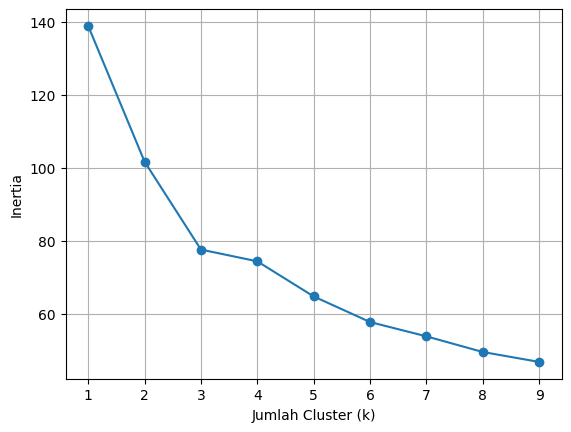

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data_normalized.csv")

# Drop kolom non-fitur
fitur = df.drop(columns=["user_id", "User full name", "pekan"])

# Normalisasi
scaler = MinMaxScaler()
fitur_scaled = scaler.fit_transform(fitur)

# Tentukan jumlah cluster optimal (pakai elbow method)
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fitur_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('')
plt.grid(True)
plt.show()


SHILLOUTE SCORE


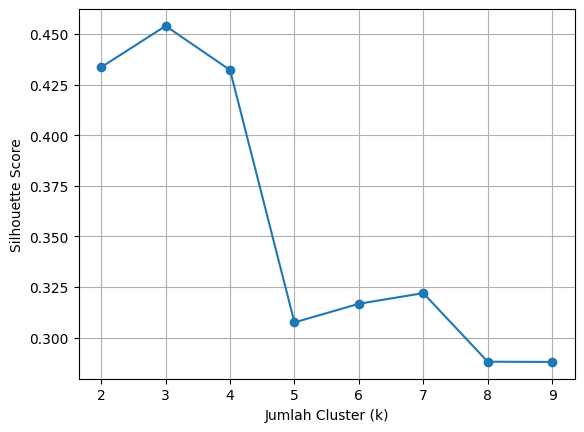

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):  # minimal k = 2 untuk silhouette
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(fitur_scaled)
    score = silhouette_score(fitur_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Load data normalisasi
df = pd.read_csv("data_normalized.csv")

# 2. Simpan kolom non-fitur untuk nanti digabung lagi
meta = df[["user_id", "User full name", "pekan"]]
fitur = df.drop(columns=["user_id", "User full name", "pekan"])

# 3. Clustering KMeans dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(fitur)

# 4. Mapping nama cluster → SRL Label
cluster_mean = df.groupby("cluster")[fitur.columns].mean()
sorted_cluster = cluster_mean.mean(axis=1).sort_values(ascending=False)
mapping = {idx: label for idx, label in zip(sorted_cluster.index, ['Tinggi', 'Sedang', 'Rendah'])}
df["SRL_label"] = df["cluster"].map(mapping)

# 5. Gabungkan kembali dengan info awal
df_final = pd.concat([meta, fitur, df[["cluster", "SRL_label"]]], axis=1)

# 6. Simpan ke file
df_final.to_csv("data_clustered_srl.csv", index=False)
print("✅ Data clustering SRL berhasil disimpan sebagai 'data_clustered_srl.csv'")


✅ Data clustering SRL berhasil disimpan sebagai 'data_clustered_srl.csv'


In [ ]:
import pandas as pd

# Baca file
df = pd.read_csv("data_clustered_srl.csv")

# Ganti nama kolom
df.rename(columns={"SRL_level": "SRL_label"}, inplace=True)

# Simpan kembali ke file yang sama
df.to_csv("data_clustered_srl.csv", index=False)

# Tampilkan kolom untuk konfirmasi
print(df.columns.tolist())


['user_id', 'User full name', 'pekan', 'frekuensi_file', 'frekuensi_url', 'frekuensi_page', 'frekuensi_h5p', 'total_frekuensi_akses', 'durasi_menit', 'frekuensi_tugas_quiz', 'durasi_tugas_quiz', 'total_durasi_forum', 'jumlah_kunjungan_forum', 'jumlah_postingan_forum', 'konten_regularity_score', 'cluster', 'SRL_label']


In [ ]:
# Ringkasan total per fitur
event_summary = df[['frekuensi_file', 'frekuensi_url', 'frekuensi_page',
                    'frekuensi_h5p', 'frekuensi_tugas_quiz', 'jumlah_kunjungan_forum',
                    'jumlah_postingan_forum']].sum().sort_values(ascending=False)

print(event_summary)


frekuensi_tugas_quiz      121.550000
jumlah_postingan_forum     58.222222
frekuensi_file             51.000000
frekuensi_url              29.307692
jumlah_kunjungan_forum     26.200000
frekuensi_h5p              19.511364
frekuensi_page              9.142857
dtype: float64


DISTRIBUSI SRL
DARI K-MEANS CLUSTERING

In [ ]:
import pandas as pd

# Baca file
df = pd.read_csv("data_clustered_srl.csv")

# Ganti nama kolom jika perlu
df.rename(columns={"SRL_level": "SRL_label"}, inplace=True)

# Simpan kembali ke file yang sama
df.to_csv("data_clustered_srl.csv", index=False)

# Tampilkan hanya kolom user_id dan SRL_label
print(df[["user_id", "SRL_label"]])


     user_id SRL_label
0      76562    Rendah
1      76154    Rendah
2      77897    Rendah
3      76754    Tinggi
4      76963    Rendah
..       ...       ...
683    76929    Sedang
684    76796    Rendah
685    76192    Rendah
686    76261    Rendah
687    76686    Rendah

[688 rows x 2 columns]


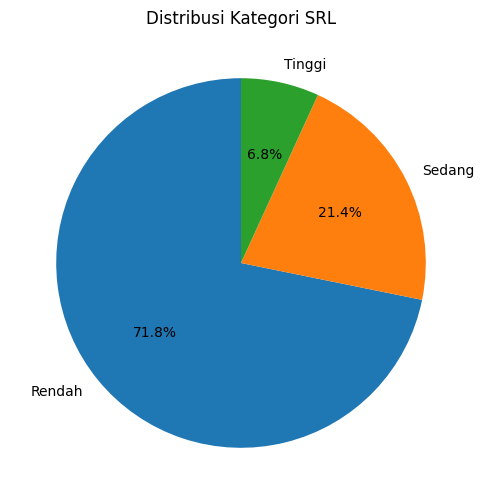

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca ulang file yang sudah di-update
df = pd.read_csv("data_clustered_srl.csv")

# Hitung jumlah data per level
cluster_counts = df["SRL_label"].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
cluster_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.title("Distribusi Kategori SRL")
plt.show()


### **EVALUASI AKURASI RANDOM FOREST DATASET GABUNGAN**



🎯 Accuracy: 0.9710

Label        Precision    Recall    F1-Score   Support
Rendah          0.9703    0.9899      0.9800        99
Sedang          0.9643    0.9000      0.9310        30
Tinggi          1.0000    1.0000      1.0000         9

Macro avg       0.9782    0.9633      0.9703       138
Weighted avg      0.9709    0.9710      0.9707       138


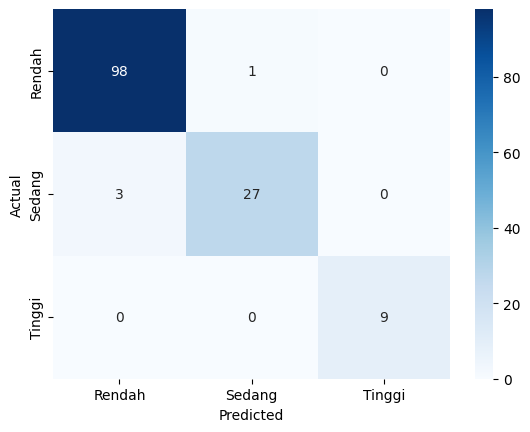

C:\Users\OPAL\AppData\Local\Temp\ipykernel_9376\2854787869.py:59: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\BERKAS EKSTENSI\Log Activity\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


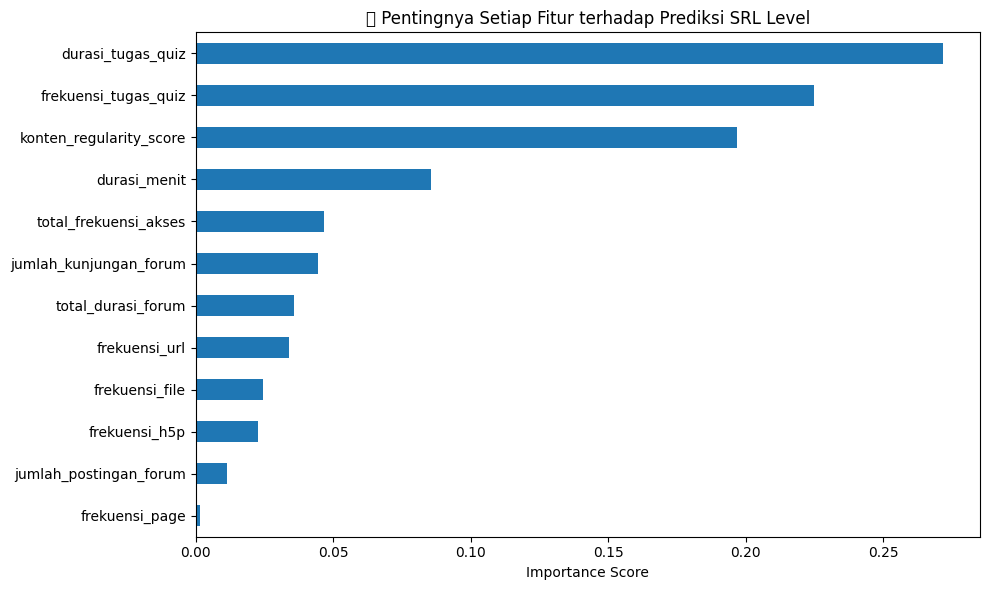

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data clustering
df = pd.read_csv("data_clustered_srl.csv")

# 2. Drop kolom non-fitur
X = df.drop(columns=["user_id", "User full name", "pekan", "cluster", "SRL_label"])
y = df["SRL_label"]

# 3. Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Buat dan latih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Evaluasi model
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

# Manual formatting classification report
from sklearn.metrics import precision_recall_fscore_support

labels = ["Rendah", "Sedang", "Tinggi"]
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=labels)

print(f"\n🎯 Accuracy: {acc:.4f}\n")
print(f"{'Label':<10}{'Precision':>12}{'Recall':>10}{'F1-Score':>12}{'Support':>10}")
for i, label in enumerate(labels):
    print(f"{label:<10}{precision[i]:12.4f}{recall[i]:10.4f}{f1[i]:12.4f}{support[i]:10d}")

# Hitung macro & weighted average
macro_avg = precision_recall_fscore_support(y_test, y_pred, average='macro')
weighted_avg = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\n{'Macro avg':<10}{macro_avg[0]:12.4f}{macro_avg[1]:10.4f}{macro_avg[2]:12.4f}{sum(support):10d}")
print(f"{'Weighted avg':<10}{weighted_avg[0]:12.4f}{weighted_avg[1]:10.4f}{weighted_avg[2]:12.4f}{sum(support):10d}")

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. Visualisasi Feature Importance
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=True).plot(kind="barh", figsize=(10, 6))
plt.title("🎯 Pentingnya Setiap Fitur terhadap Prediksi SRL Level")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


DISTRIBUSI DATA LATIH DAN DATA UJI

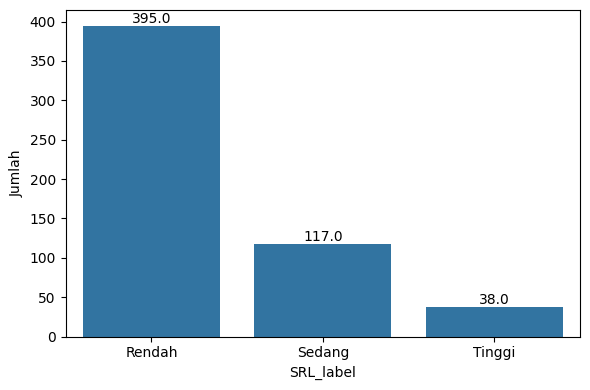

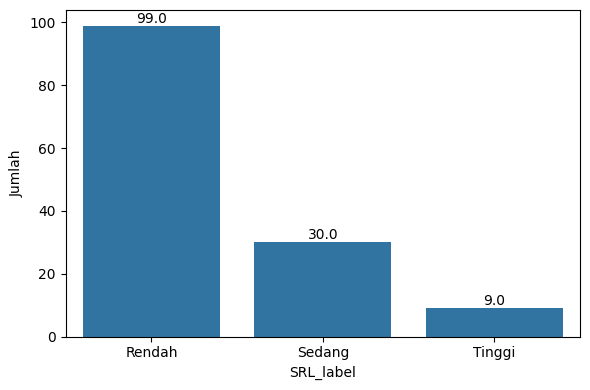

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Bar chart untuk data latih ---
plt.figure(figsize=(6, 4))
ax1 = sns.countplot(x=y_train, order=["Rendah", "Sedang", "Tinggi"])
plt.xlabel("SRL_label")
plt.ylabel("Jumlah")

# Tambahkan angka di atas batang
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- Bar chart untuk data uji ---
plt.figure(figsize=(6, 4))
ax2 = sns.countplot(x=y_test, order=["Rendah", "Sedang", "Tinggi"])
plt.xlabel("SRL_label")
plt.ylabel("Jumlah")

# Tambahkan angka di atas batang
for p in ax2.patches:
    ax2.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


### **EVALUASI AKURASI RANDOM FOREST DATASET Gabungan Tuned**